# Итоговая работа.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [ ]:
2⋅tan(sin(x)+cos(2⋅x+3))⋅(cos(x)−2⋅sin(2⋅x+3))⋅cos2(sin(x)+cos(2⋅x+3))−1

In [24]:
def function(x):
    return math.tan(math.sin(x) + math.cos(2*x + 3))**2

def first_derivative(x):
    return 2*math.tan(math.sin(x) + math.cos(2*x + 3)) * (math.cos(x) - 2*math.sin(2*x + 3)) / math.cos(math.sin(x) + math.cos(2*x + 3))**2

In [28]:
x0 = 1
print(f'Производная функции равна: {first_derivative(x0):.2f}')

Производная функции равна: 55.39


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

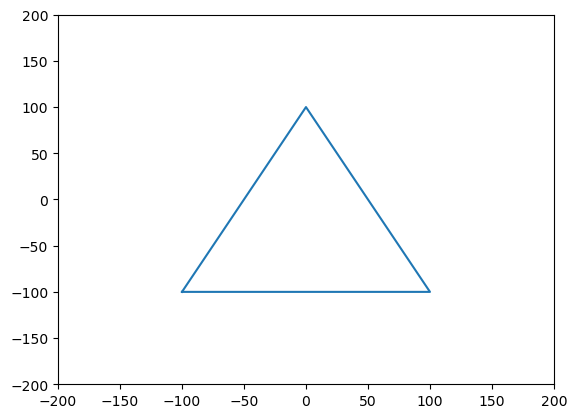

In [45]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(0.0, 400.0)

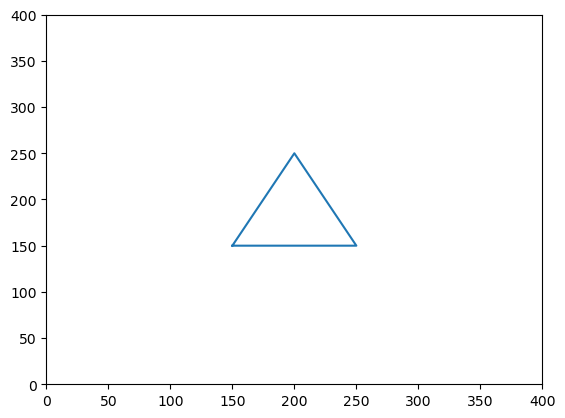

In [56]:
# Масштабирование на 0.5, cмещение на 200
A_scale = np.dot(A[:, :2], 0.5)

shift_v = np.array([200, 200])
A_shift = A_scale + shift_v

x = A_shift[:,0]
y = A_shift[:,1]
plt.plot(x, y)
plt.ylim([0, 400])
plt.xlim([0, 400]) 

(0.0, 600.0)

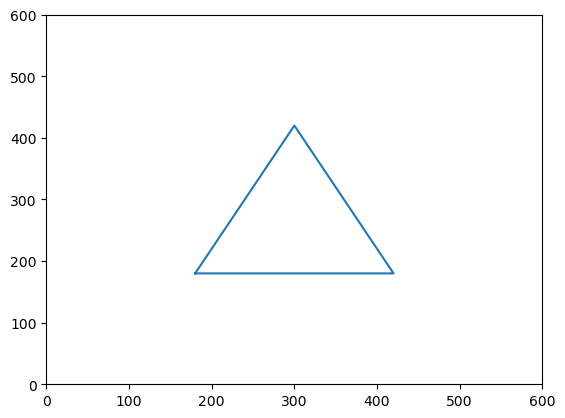

In [55]:
# Масштабирование на 1.2, cмещение на 300
A_scale = np.dot(A[:, :2], 1.2)

shift_v = np.array([300, 300])
A_shift = A_scale + shift_v

x = A_shift[:,0]
y = A_shift[:,1]
plt.plot(x, y)
plt.ylim([0, 600])
plt.xlim([0, 600]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [73]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [76]:
eigenval, eigenvector = np.linalg.eig(m)
print(f'Собственные значения: {eigenval}')
print(f'Собственные векторы: \n{eigenvector}')

Собственные значения: [ 3. -1.]
Собственные векторы: 
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [173]:
from scipy.optimize import minimize

In [174]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [175]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

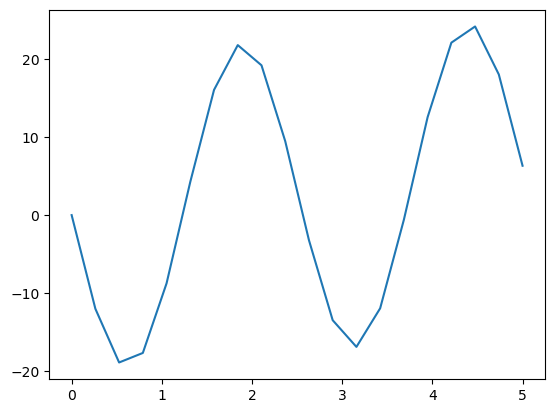

In [176]:
plt.plot(x, fx)
plt.show()

In [177]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [178]:
x0 = [0,0]
result = minimize(error, x0)

In [179]:
print("Оптимальные параметры:")
print(f"a: {optimal_a}, b: {optimal_b}, fun: {result.fun}")

Оптимальные параметры:
a: 1.314423549349014, b: 0.20853162801477063, fun: 235.7663539781106


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [164]:
from sklearn.metrics.pairwise import cosine_similarity

In [165]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [167]:
# Косинусное сходство
similarity_matrix = cosine_similarity(raitings)
similarity_matrix

array([[1.        , 0.82602919, 0.84921529, 0.78340116, 0.81917632,
        0.74118548, 0.72735828, 0.80967522, 0.91065982, 0.86010776],
       [0.82602919, 1.        , 0.81234325, 0.84635337, 0.87138052,
        0.82713107, 0.82629684, 0.80026003, 0.82526308, 0.81968127],
       [0.84921529, 0.81234325, 1.        , 0.84669374, 0.78394299,
        0.79097985, 0.67616223, 0.76289552, 0.82112077, 0.91873051],
       [0.78340116, 0.84635337, 0.84669374, 1.        , 0.69153409,
        0.78665792, 0.83274211, 0.82934667, 0.7770666 , 0.8588687 ],
       [0.81917632, 0.87138052, 0.78394299, 0.69153409, 1.        ,
        0.7764434 , 0.78200468, 0.81236869, 0.87948477, 0.84574789],
       [0.74118548, 0.82713107, 0.79097985, 0.78665792, 0.7764434 ,
        1.        , 0.74011801, 0.84451685, 0.80622876, 0.85514908],
       [0.72735828, 0.82629684, 0.67616223, 0.83274211, 0.78200468,
        0.74011801, 1.        , 0.82669174, 0.81130044, 0.79154718],
       [0.80967522, 0.80026003, 0.7628955

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [181]:
for i in range(similarity_matrix.shape[0]):
    # Исключаем косинусное сходство с собой
    similarity_matrix[i][i] = -1
    # Находим максимальное значение
    max_similarity = max(similarity_matrix[i])
    # Находим индекс максимального значения
    max_index = np.argmax(similarity_matrix[i])

    print(f'Пользователь {i+1} наибольшее сходство с пользователем {max_index+1}. Косинусное сходство {max_similarity:.2f}')

Пользователь 1 наибольшее сходство с пользователем 9. Косинусное сходство 0.91
Пользователь 2 наибольшее сходство с пользователем 5. Косинусное сходство 0.87
Пользователь 3 наибольшее сходство с пользователем 10. Косинусное сходство 0.92
Пользователь 4 наибольшее сходство с пользователем 10. Косинусное сходство 0.86
Пользователь 5 наибольшее сходство с пользователем 9. Косинусное сходство 0.88
Пользователь 6 наибольшее сходство с пользователем 10. Косинусное сходство 0.86
Пользователь 7 наибольшее сходство с пользователем 4. Косинусное сходство 0.83
Пользователь 8 наибольшее сходство с пользователем 6. Косинусное сходство 0.84
Пользователь 9 наибольшее сходство с пользователем 1. Косинусное сходство 0.91
Пользователь 10 наибольшее сходство с пользователем 3. Косинусное сходство 0.92
